In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
services = ["rest-api", "graphql-api", "grpc-api", "soap-api"]

stats_data = {}
history_data = {}

def load_data():
    for service in services:
        try:
            stats_file = f"results/{service}_stats.csv"
            history_file = f"results/{service}_stats_history.csv"
            
            stats_data[service] = pd.read_csv(stats_file)
            history_data[service] = pd.read_csv(history_file)
        except FileNotFoundError:
            print(f"Arquivos para {service} não encontrados")

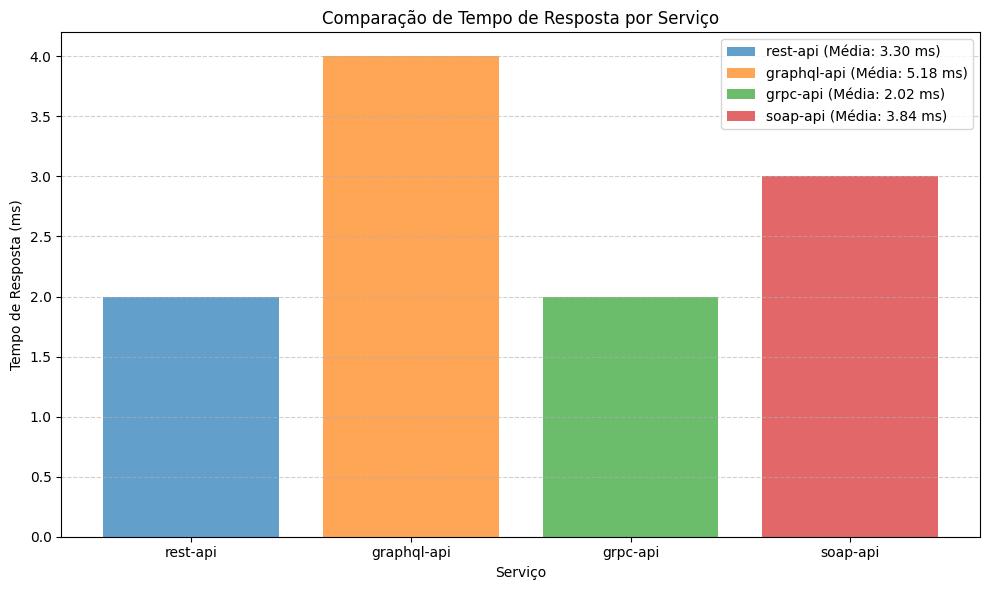

In [6]:
def plot_comparison():
    plt.figure(figsize=(10, 6))
    for service in services:
        if service in stats_data:
            stats = stats_data[service]
            median_response_time = stats["Median Response Time"].iloc[0] if "Median Response Time" in stats.columns else 0
            average_response_time = stats["Average Response Time"].iloc[0] if "Average Response Time" in stats.columns else 0
            
            plt.bar(
                service,
                median_response_time,
                label=f"{service} (Média: {average_response_time:.2f} ms)",
                alpha=0.7
            )
    
    plt.title("Comparação de Tempo de Resposta por Serviço")
    plt.xlabel("Serviço")
    plt.ylabel("Tempo de Resposta (ms)")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

load_data()

plot_comparison()

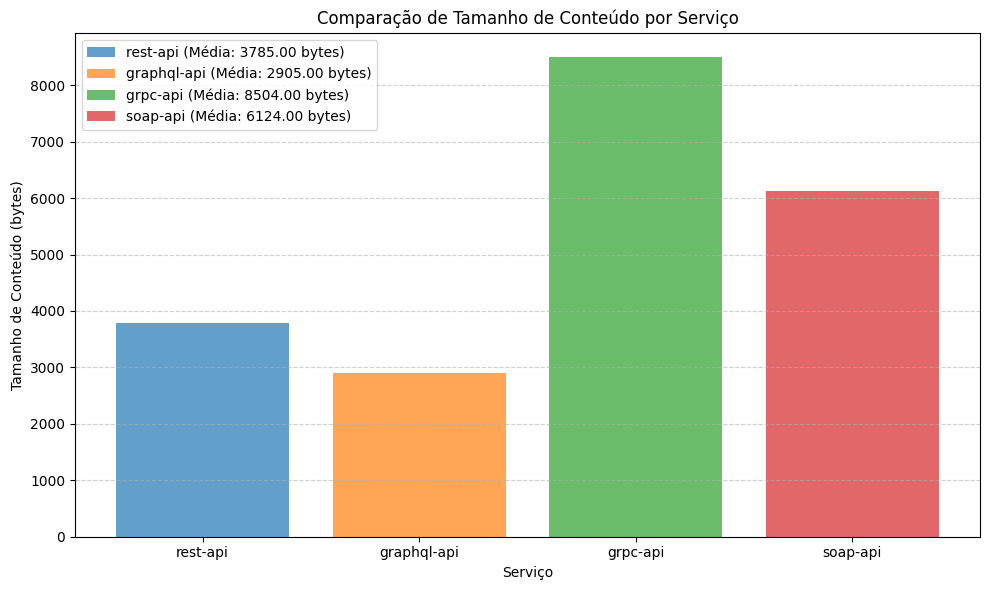

In [9]:
def plot_content_size_comparison():
    plt.figure(figsize=(10, 6))
    for service in services:
        if service in stats_data:
            stats = stats_data[service]
            average_content_size = stats["Average Content Size"].iloc[0] if "Average Content Size" in stats.columns else 0
            
            plt.bar(
                service,
                average_content_size,
                label=f"{service} (Média: {average_content_size:.2f} bytes)",
                alpha=0.7
            )
    
    plt.title("Comparação de Tamanho de Conteúdo por Serviço")
    plt.xlabel("Serviço")
    plt.ylabel("Tamanho de Conteúdo (bytes)")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
    
plot_content_size_comparison()
    